In [1]:
import numpy as np
import pandas as pd
from matplotlib import font_manager , rc
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='Malgun Gothic')

In [5]:
df= pd.read_csv('./서울시 코로나19 확진자 현황.csv',low_memory=False)
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      99550 non-null  int64 
 1   확진일     99550 non-null  object
 2   지역      99550 non-null  object
 3   여행력     1717 non-null   object
 4   접촉력     99550 non-null  object
 5   상태      99550 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


데이터 확인 전처리

In [ ]:
# 불필요한 컬럼 삭제
df=df.drop(columns=['환자번호','국적','환자정보',
                    '조치사항','이동경로','등록일',
                    '수정일','노출여부']) 

In [12]:
df.head(3)

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-


In [13]:
#확진일 - > datetime
df['확진일'] = pd.to_datetime(df['확진일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  object        
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.6+ MB


In [15]:
print(len(df['지역'].unique()))

29


In [16]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [27]:
df['지역'] = df['지역'].str.strip()

In [22]:
df['지역'] = df['지역'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


In [23]:
df.isna().sum() # 결측치 확인

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

In [40]:
#구별 확인자 동향
#확진일 - 구별로 pivot_table로 집계
df_gu=pd.pivot_table(df,index='확진일', columns='지역', 
               values='연번',aggfunc='count',
              fill_value=0 , margins=True)

In [41]:
#서울시 일별 추가확진다 동향
s_date = df_gu['All'][:-1]

In [43]:
#서울시 일별 추가확진자가 많은 순으로
s_date.sort_values(ascending=False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

In [46]:
#서울시 일별 추가 확진자 시각화
from matplotlib import font_manager , rc
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='Malgun Gothic')

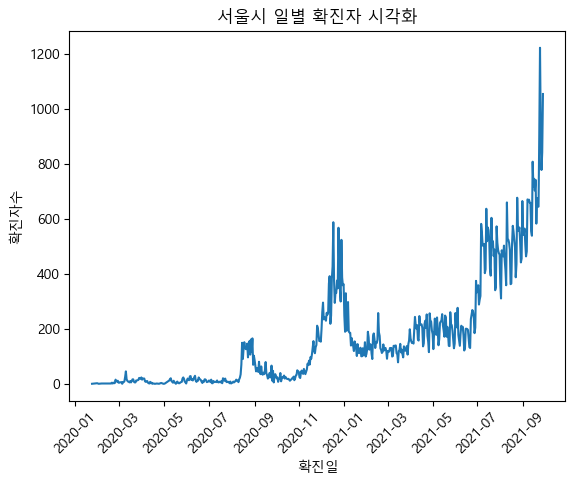

In [47]:
x = s_date.index
y = s_date.values
plt.plot(x,y)
plt.title('서울시 일별 확진자 시각화')
plt.xlabel('확진일')
plt.ylabel('확진자수')
plt.xticks(rotation=45)
plt.show()

In [50]:
#서울시 구별 누적 확진자 비교
s_gu = df_gu.loc['All'][:-1]
s_gu = s_gu.sort_values(ascending=False)

In [51]:
s_gu

지역
강남구     6926
송파구     6356
관악구     5418
타시도     4715
영등포구    4463
강서구     4447
은평구     4284
서초구     4284
구로구     4168
동작구     4120
노원구     3932
강동구     3782
성북구     3779
중랑구     3729
마포구     3726
동대문구    3487
광진구     3486
양천구     3291
성동구     2839
용산구     2705
서대문구    2692
강북구     2606
도봉구     2605
기타      2321
금천구     2064
중구      1708
종로구     1617
Name: All, dtype: int64

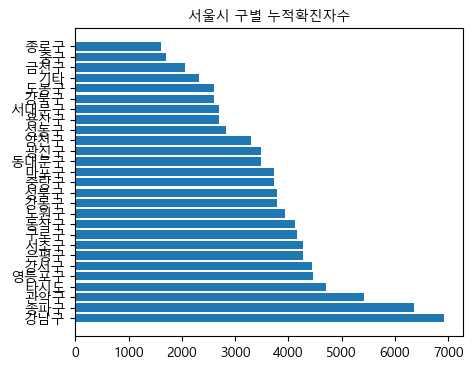

In [55]:
#서울시 구별 누적확진자 많은 순 시각화
x = s_gu.index
y = s_gu.values
plt.figure(figsize=(5,4))
plt.barh(x,y)
plt.title('서울시 구별 누적확진자수',size=10)
plt.show()

In [72]:
#최근일(21-09-28) 기준 지역별 확진자
s_gu1 = df_gu.iloc[-2][:-1]
s_gu1 = s_gu.sort_values(ascending=False)

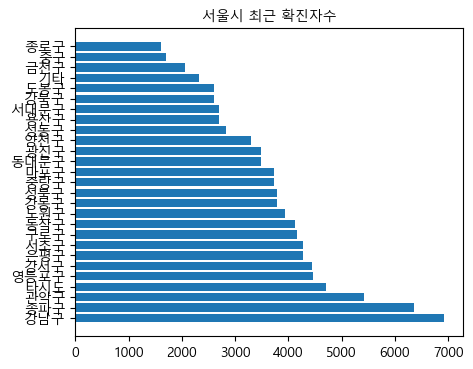

In [62]:
x = s_gu1.index
y = s_gu1.values
plt.figure(figsize=(5,4))
plt.barh(x,y)
plt.title('서울시 최근 확진자수',size=10)
plt.show()


In [64]:
#접촉력에 따른 확진 분석
df['접촉력'].unique()

array(['감염경로 조사중', '기타 확진자 접촉', '송파구 소재 시장 관련(?21.9.)', ..., '은평성모병원',
       '명성교회', '종로구 집단발병'], dtype=object)

In [81]:
df['접촉력'].value_counts()[:10].to_frame()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  object        
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.6+ MB


In [82]:
# 최근 (2021-09)9월달 접촉력에 따른 확진건수 best10
# 확진일을  연도 & 월 [ 접촉력].value_counts()[:10].to_frame()
df[(df['확진일'].dt.year == 2021) & 
       (df['확진일'].dt.month== 9)]['접촉력'].value_counts()[:10].to_frame()

,접촉력
감염경로 조사중,8117
기타 확진자 접촉,8088
송파구 소재 시장 관련(?21.9.),658
타시도 확진자 접촉,587
중구 소재 시장 관련(?21.9.),277
병원 및 요양시설,186
해외유입,122
용산구 소재 병원 관련(?21.9.),77
동대문구 소재 시장 관련,44
강서구 소재 시장 관련,44


지역
강남구     6926
송파구     6356
관악구     5418
타시도     4715
영등포구    4463
강서구     4447
은평구     4284
서초구     4284
구로구     4168
동작구     4120
노원구     3932
강동구     3782
성북구     3779
중랑구     3729
마포구     3726
동대문구    3487
광진구     3486
양천구     3291
성동구     2839
용산구     2705
서대문구    2692
강북구     2606
도봉구     2605
기타      2321
금천구     2064
중구      1708
종로구     1617
Name: All, dtype: int64